In [2]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['darkorange', 'c'])

# The Iris flower data set consists of 50 samples from each of three species of Iris 
# (1) Iris setosa, 
# (2) Iris virginica,
# (3) Iris versicolor. 
#
# Four features were measured from each sample: 
# (1) length of the sepals (cm)
# (2) length of the petals (cm)
# (3) width of the sepals  (cm)
# (4) width of the petals  (cm)
#
# We will use on two features because it is easy to visualize 2-dimensional data.
# Problem Statement:
# Based on the combination of these four features, we need to build perceptron classifier

iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
indices = Y!=2
X,Y = X[indices,:], Y[indices]
Y[Y==0] = -1

# Lets visualize the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(X[:,0].min() - 1, X[:,0].max() + 1)
plt.ylim(X[:,1].min() - 1, X[:,1].max() + 1)
plt.show()

# get rid of the biases and stuff......
X = X - np.mean(X,axis=0)

<Figure size 640x480 with 1 Axes>

In [3]:
# split data into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
#initialize Weights to zero values
W = np.zeros((2,1))
# set some learning rate for gradient descent
lr = 0.1

for epoch in range(1000):
    for idx in range(len(X_train)): 
        # update weights if the prediction is wrong 
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    if epoch % 100 == 0:
        # print accruacy on test data
        # keep a track of everything happening here.. . . .
        Y_test_pred = (X_test@W).reshape(-1)
        Y_test_pred[Y_test_pred < 0] = -1
        Y_test_pred[Y_test_pred >= 0] = 1
        
        acc = np.mean(Y_test == Y_test_pred)
        print(f"Epoch: {epoch}, Test Accuracy: {acc}")

Epoch: 0, Test Accuracy: 1.0
Epoch: 100, Test Accuracy: 1.0
Epoch: 200, Test Accuracy: 1.0
Epoch: 300, Test Accuracy: 1.0
Epoch: 400, Test Accuracy: 1.0
Epoch: 500, Test Accuracy: 1.0
Epoch: 600, Test Accuracy: 1.0
Epoch: 700, Test Accuracy: 1.0
Epoch: 800, Test Accuracy: 1.0
Epoch: 900, Test Accuracy: 1.0


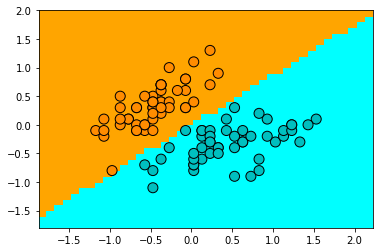

In [5]:
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()